In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# %%
data = pd.read_csv("hafta9labdata.csv")

# %%
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
# malignant = M  kotu huylu tumor
# benign = B     iyi huylu tumor

data.head()#sshows data 

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


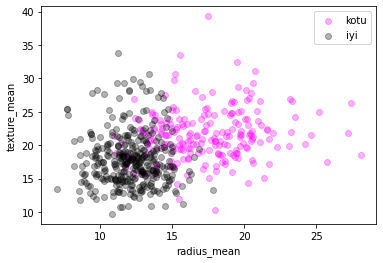

In [43]:
# %%
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]
# scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="magenta",label="kotu",alpha= 0.3)
plt.scatter(B.radius_mean,B.texture_mean,color="black",label="iyi",alpha= 0.3)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

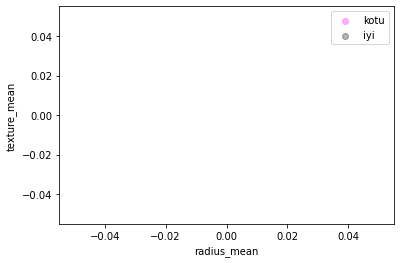

In [11]:
# # %%
# M = data[data.area_mean == "1001.0"]
# B = data[data.area_mean == "1326.0"] # we are trying draw area_mean graphic but it has only 3 variable so itsnot visible
# #i think
# # scatter plot
# plt.scatter(M.radius_mean,M.texture_mean,color="magenta",label="kotu",alpha= 0.3)
# plt.scatter(B.radius_mean,B.texture_mean,color="black",label="iyi",alpha= 0.3)
# plt.xlabel("radius_mean")
# plt.ylabel("texture_mean")
# plt.legend()
# plt.show()

In [45]:
# %%
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

# %%
# normalization 
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

#%%
# train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

# %% SVM

from sklearn.svm import SVC

for i in range(0,30):
    svm = SVC(random_state = i,C=0)
    svm.fit(x_train,y_train)
    print("print accuracy of svm algo: ",svm.score(x_test,y_test))
    



ValueError: The number of classes has to be greater than one; got 1 class

In [34]:
# %% test
print("print accuracy of svm algo: ",svm.score(x_test,y_test))

print accuracy of svm algo:  0.9649122807017544


In [35]:
y_pred = svm.predict(x_test)  
y_pred

array([0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

In [36]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[106,   2],
       [  4,  59]], dtype=int64)